In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
df = pd.read_csv('iris.csv')
print(df.shape)

(150, 5)


In [27]:
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

In [40]:
# Standardize the data
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_standardized = (X - X_mean) / X_std
print(X_standardized.shape)

(150, 4)


In [34]:
# Calculate the covariance matrix
cov_matrix = np.cov(X_standardized, rowvar=False)
print(cov_matrix)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [35]:
# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)


In [41]:
# Sort eigenvectors by decreasing eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [37]:
# Project the data onto the first two principal components
X_pca = X_standardized.dot(eigenvectors[:, :2])


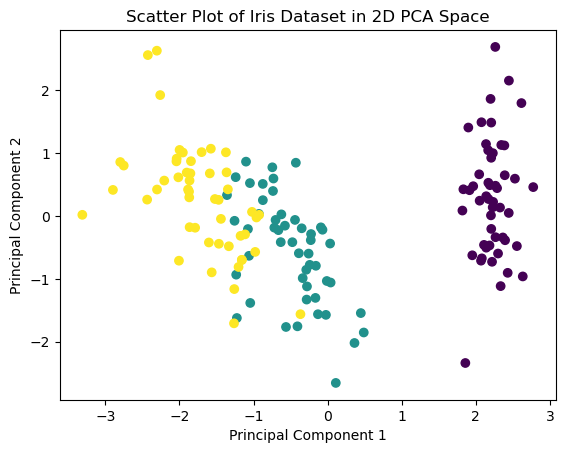

In [38]:
# Create a scatter plot
plt.scatter(X_pca[:,0], X_pca[:,1], c = y )
plt.title('Scatter Plot of Iris Dataset in 2D PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
